Aidan Patterson

Submetric: Quantity and Severity of Fire Incidents in the Neighborhoods of Pittsburgh

When analyzing the quality of life of a given area, it is important to take into account not only the positives one would experience living in such an area but also the negatives and dangers of that area. I chose to analyze fire incidents in the neighborhoods of Pittsburgh as my submetric for determining the neighborhood with the highest quality of life. The best neighborhood would be one with the least amount and severity of fires.

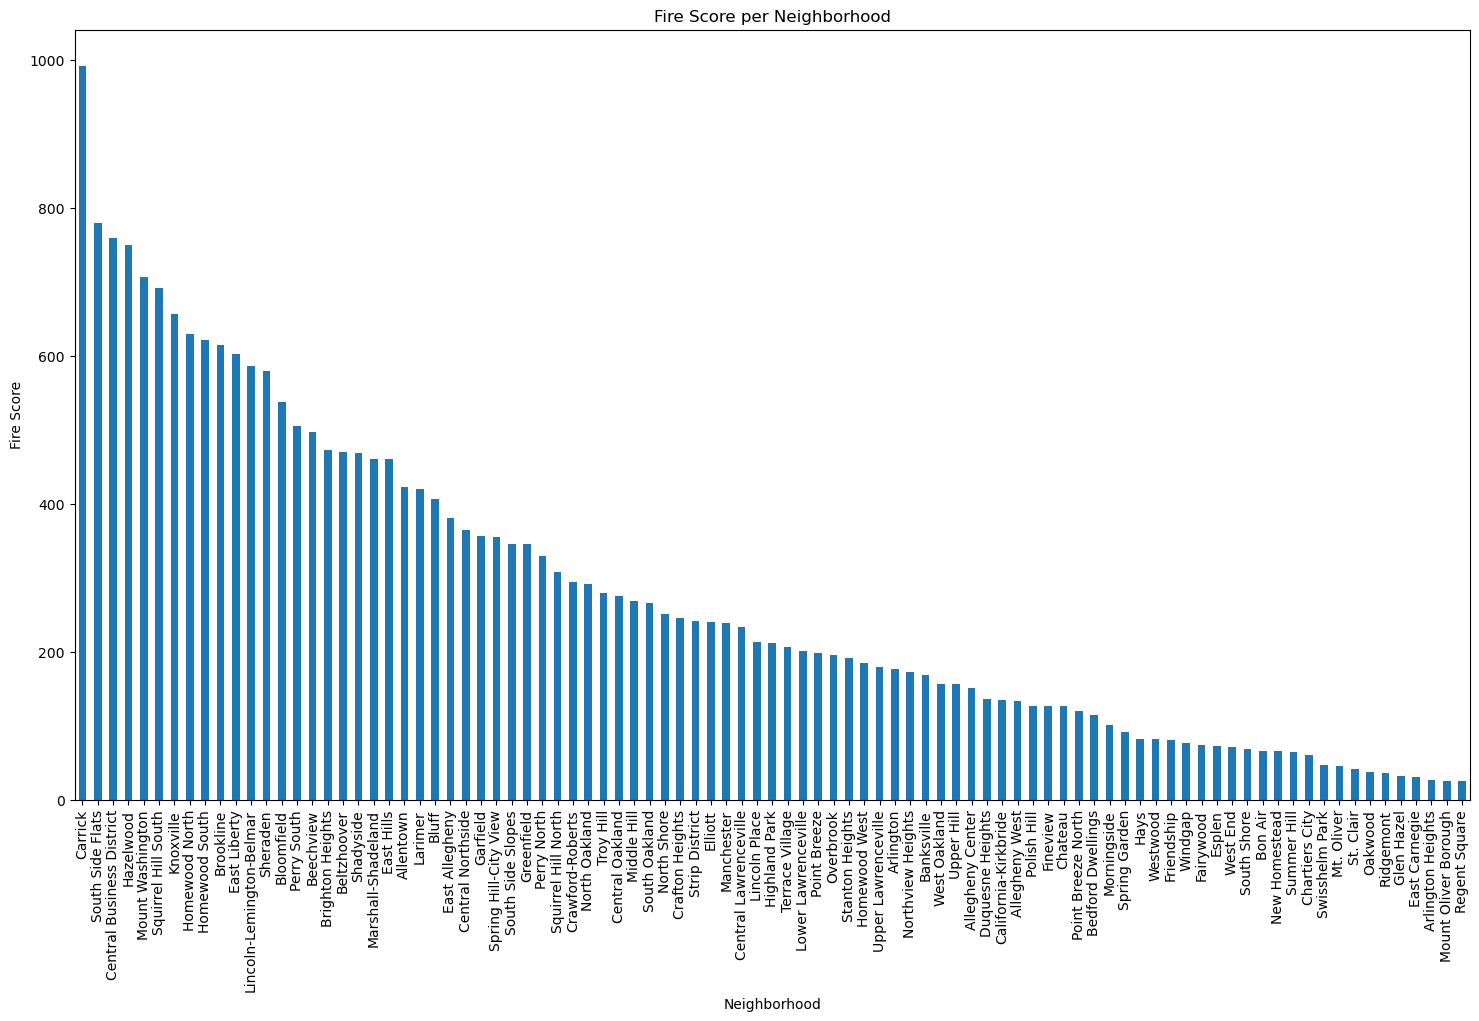


Best Neighborhood: Mount Oliver Borough

Worst Neighborhood: Carrick

Average Fire Score:
276.72527472527474

Average Fire Score:
212.0

Worst Neighborhoods:


neighborhood
Brookline                    614
Homewood South               621
Homewood North               629
Knoxville                    656
Squirrel Hill South          692
Mount Washington             707
Hazelwood                    750
Central Business District    759
South Side Flats             779
Carrick                      991
Name: Fire_Score, dtype: int64


Best Neighborhoods:


neighborhood
Regent Square           25
Mount Oliver Borough    25
Arlington Heights       27
East Carnegie           31
Glen Hazel              32
Ridgemont               36
Oakwood                 37
St. Clair               41
Mt. Oliver              46
Swisshelm Park          47
Name: Fire_Score, dtype: int64

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('fires.csv')

#Function used to determine the fire score of a given incident using key words
def fireScorer(row):
    for str in data['neighborhood']:
        if pd.Series(row).str.contains('contained|confined', case=False, na=False).any():
            return 1
        if pd.Series(row).str.contains('explosion|building fire', case=False, na=False).any():
            return 5
        else:
            return 3

#Add the fire scores to a new column in the dataframe
data['Fire_Score'] = data.apply(fireScorer, axis=1)

#Creating a barplot display
plt.figure(figsize=(18,10))
fire_scores.plot(kind='bar')
plt.title('Fire Score per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Fire Score')
plt.show()

#To find the best and worst neighborhoods we group/sum fire scores by neighborhood and take the min and max
neighborhood_totals = data.groupby('neighborhood')['Fire_Score'].sum()
best_neighborhood = neighborhood_totals.idxmin()
worst_neighborhood = neighborhood_totals.idxmax()

print()
print("Best Neighborhood: " + best_neighborhood)
print()
print("Worst Neighborhood: " + worst_neighborhood)

avg = neighborhood_totals.mean()
print()
print("Average Fire Score:")
print(avg)

avg = neighborhood_totals.median()
print()
print("Median Fire Score:")
print(avg)

sorted_totals = neighborhood_totals.sort_values()

print()
print("Worst Neighborhoods:")
display(sorted_totals.tail(10))

print()
print("Best Neighborhoods:")
display(sorted_totals.head(10))

By analyzing the data, it is clear that the safest neighborhoods, as far as my fire score metric is concerned, are Rugent Square and Mont Oliver Borough. Both of these neighborhoods have a significantly lower fire score compared to both the median and mean. On the other hand, the worst neighborhood by a large margin is Carrick. This result is very interesting and pretty surprising, given that Carrick and Mont Oliver Borough are next to each other; however, it should be noted that Carrick is larger in land area than Mont Oliver Borough and Rugent Square.